# Characterizing Vertical BDA

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from mic_instrument.startup import *

I Sat-12:59:33.513: **************************************** Bluesky Startup Initialized



Below are the IPython logging settings for your session.
These settings have no impact on your experiment.

Activating auto-logging. Current session state plus future input saved.
Filename       : /home/beams43/STAFF19ID/bluesky_gyl/bluesky-mic/notebooks/.logs/ipython_log.py
Mode           : rotate
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active


I Sat-12:59:34.329: APS DM environment file: /home/dm_id/etc/dm.setup.sh
I Sat-12:59:34.332: APS DM workflow owner: 19id


Exception reporting mode: Plain

End of IPython settings



I Sat-12:59:36.513: Databroker catalog: 19id_isn
I Sat-12:59:36.521: using ophyd control layer: 'pyepics'
I Sat-12:59:37.073: /home/beams43/STAFF19ID/bluesky_gyl/bluesky-mic/src/instrument/devices/utils.py
I Sat-12:59:37.074: /home/beams43/STAFF19ID/bluesky_gyl/bluesky-mic/src/instrument/devices/save_data.py
I Sat-12:59:37.077: /home/beams43/STAFF19ID/bluesky_gyl/bluesky-mic/src/instrument/utils/writeDetH5.py
I Sat-12:59:37.078: /home/beams43/STAFF19ID/bluesky_gyl/bluesky-mic/src/instrument/devices/xspress3.py
I Sat-12:59:37.081: /home/beams43/STAFF19ID/bluesky_gyl/bluesky-mic/src/instrument/devices/scan_record.py
I Sat-12:59:37.129: /home/beams43/STAFF19ID/bluesky_gyl/bluesky-mic/src/instrument/devices/data_management.py
I Sat-12:59:37.555: /home/beams43/STAFF19ID/bluesky_gyl/bluesky-mic/src/instrument/devices/ad_fileplugin.py
I Sat-12:59:37.562: /home/beams43/STAFF19ID/bluesky_gyl/bluesky-mic/src/instrument/devices/eiger1m.py
I Sat-12:59:39.704: /home/beams43/STAFF19ID/bluesky_gyl/bl

bda_vert_size:   0%|               | 3e-05/5.30272 [00:00<6:56:55, 4717.49s/mm]
bda_vert_size [In progress. No progress bar available.]                        
bda_vert_size:   0%|              | 0.00011/3.4966 [00:00<1:15:11, 1290.19s/mm]
bda_vert_size [In progress. No progress bar available.]                        
bda_vert_size:   0%|                | 0.00018/1.68868 [00:00<22:04, 784.66s/mm]
bda_vert_size [In progress. No progress bar available.]                        
bda_vert_center:   0%|             | 2e-05/1.00018 [00:00<1:57:25, 7044.49s/mm]
bda_vert_center [In progress. No progress bar available.]                      
bda_vert_center:   0%|              | 0.00021/0.06236 [00:00<00:41, 672.00s/mm]
bda_vert_center [In progress. No progress bar available.]                      
bda_vert_center:   0%|               | 2e-05/0.03167 [00:00<03:42, 7035.10s/mm]
bda_vert_center [In progress. No progress bar available.]                      
bda_vert_center:   0%|               | 4

We will record the date and time we're starting in case we have issues with the data catalogue and we need to recover the data. Original output = datetime.datetime(2025, 3, 29, 13, 0, 28, 616483)

In [3]:
from datetime import datetime

datetime.now()

datetime.datetime(2025, 3, 29, 13, 0, 28, 616483)

Throughout this analysis, we will be interested in the current measured by tetramm_1 and the ring current (for normalization). Currently, the scale of the tetramm_1 is set to 1e9, which means that the recorded values are in nA.

In [5]:
dets = [tetramm_1.current_1, ring.current]

First, we will find the value of the bda size where it is completely closed. For this, we will first do a rough centering scan:

In [6]:
def centering_scan(size):
    yield from bps.mv(bda_vert.size, size)
    yield from bp.scan(bda_vert.center, 20, 20.6, num=20)

bda_vert_center:   0%|                           | 0.0/0.00015 [00:00<?, ?mm/s]
bda_vert_center:   7%|▉             | 1e-05/0.00015 [00:00<00:03, 25509.55s/mm]
bda_vert_center:   0%|                           | 0.0/0.00015 [00:00<?, ?mm/s]
bda_vert_center:   7%|▉             | 1e-05/0.00015 [00:00<00:08, 59953.64s/mm]
bda_vert_center:   0%|                           | 0.0/0.00015 [00:00<?, ?mm/s]
bda_vert_center:   7%|▉             | 1e-05/0.00015 [00:00<00:10, 71840.62s/mm]
bda_vert_center:  13%|█▊            | 2e-05/0.00015 [00:00<00:06, 46645.05s/mm]
bda_vert_center:   7%|▉             | 1e-05/0.00015 [00:00<00:13, 94140.24s/mm]
bda_vert_center:  13%|█▊            | 2e-05/0.00015 [00:01<00:07, 58736.11s/mm]
bda_vert_center:   7%|▊            | 1e-05/0.00015 [00:01<00:16, 117907.00s/mm]
bda_vert_center:  13%|█▊            | 2e-05/0.00015 [00:01<00:09, 69474.60s/mm]
bda_vert_center:   7%|▊            | 1e-05/0.00015 [00:01<00:19, 140850.42s/mm]
bda_vert_center:  20%|██▊           | 3e

('f0158441-c905-442a-bde1-d9b4a7cbfa91',)

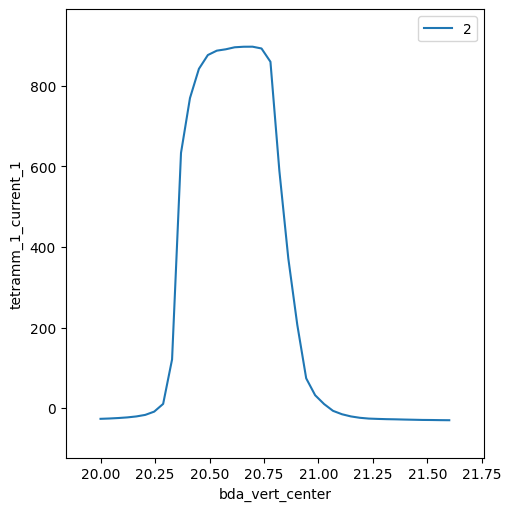

In [ ]:
RE(bp.scan(dets, bda_vert.center, 20, 21.6, num=40))

In [15]:
run = cat[-1]

In [50]:
cen_pos = bec.peaks['cen']['tetramm_1_current_1']

RE(bps.mv(bda_vert.center, cen_pos))

bda_vert_center:   2%|▎             | 0.00194/0.09587 [00:00<00:11, 126.66s/mm]
bda_vert_center:  11%|█▌             | 0.01018/0.09587 [00:00<00:02, 34.45s/mm]
bda_vert_center:  25%|████            | 0.0241/0.09587 [00:00<00:01, 18.94s/mm]
bda_vert_center:  43%|██████▌        | 0.04161/0.09587 [00:00<00:00, 13.50s/mm]
bda_vert_center:  53%|███████▉       | 0.05062/0.09587 [00:00<00:00, 13.16s/mm]
bda_vert_center:  62%|█████████▎     | 0.05961/0.09587 [00:00<00:00, 11.21s/mm]
bda_vert_center:  71%|██████████▌    | 0.06781/0.09587 [00:00<00:00, 11.38s/mm]
bda_vert_center:  79%|███████████▊   | 0.07589/0.09587 [00:00<00:00, 10.20s/mm]
bda_vert_center:  85%|████████████▊  | 0.08188/0.09587 [00:00<00:00, 10.71s/mm]
bda_vert_center:  91%|█████████████▋ | 0.08764/0.09587 [00:00<00:00, 10.03s/mm]
bda_vert_center:  97%|██████████████▌| 0.09346/0.09587 [00:00<00:00, 10.51s/mm]
bda_vert_center:  99%|██████████████▉| 0.09526/0.09587 [00:01<00:00, 11.42s/mm]
bda_vert_center: 100%|███████████████▉| 

()

Before we start the real scanning, we want to add the important values to our baseline.

In [54]:
sd = [hhl_mirrors.bender_1, hhl_mirrors.bender_2, bda_vert.size, bda_vert.center]

bda_vert_size:  25%|████▌             | 2e-05/8e-05 [00:00<00:00, 12251.87s/mm]
bda_vert_size:  12%|██▎               | 1e-05/8e-05 [00:00<00:01, 24729.25s/mm]
bda_vert_size:   0%|                               | 0.0/8e-05 [00:00<?, ?mm/s]
bda_vert_size:  12%|██▎               | 1e-05/8e-05 [00:00<00:01, 26375.22s/mm]
bda_vert_size:   0%|                               | 0.0/8e-05 [00:00<?, ?mm/s]
bda_vert_size:  12%|██▎               | 1e-05/8e-05 [00:00<00:03, 47430.87s/mm]
bda_vert_size:   0%|                               | 0.0/8e-05 [00:00<?, ?mm/s]
bda_vert_size:  12%|██▎               | 1e-05/8e-05 [00:00<00:03, 49210.55s/mm]
bda_vert_size:  25%|████▌             | 2e-05/8e-05 [00:00<00:02, 35169.46s/mm]
bda_vert_size:  12%|██▎               | 1e-05/8e-05 [00:00<00:04, 70600.75s/mm]
bda_vert_size:  25%|████▌             | 2e-05/8e-05 [00:00<00:02, 35588.17s/mm]
bda_vert_size:  12%|██▎               | 1e-05/8e-05 [00:00<00:05, 72128.39s/mm]
bda_vert_size:  12%|██▎               | 

('43aa519f-7ed1-4541-acdc-92f0d5a7343d',)

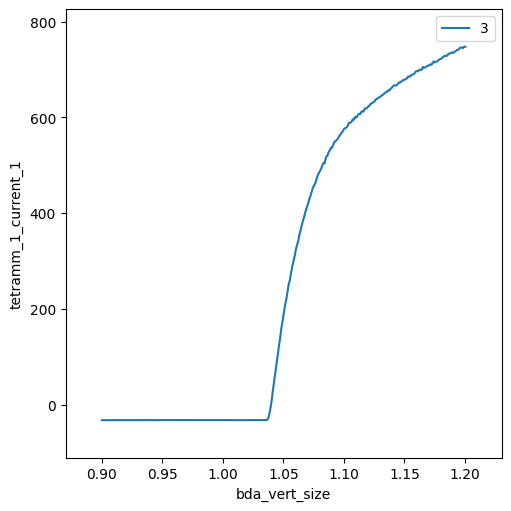

In [55]:
RE(bp.scan(dets, bda_vert.size, 0.9, 1.2, num=301))

In [ ]:
#size_data = cat[-1].primary.read().to_pandas() #only ran this once to get the data and export to csv

#size_data.to_csv('Data/BDA/bda_vert_size_data.csv')

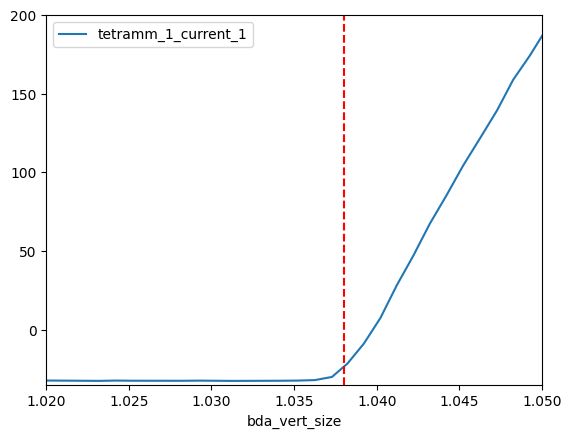

In [71]:
fig, ax = plt.subplots()

size_data.plot.line(x='bda_vert_size', y='tetramm_1_current_1', ax=ax)

ax.set_xlim(1.02, 1.05)
ax.set_ylim(-35, 200)

ax.vlines(1.038, ymin=-35, ymax=200, colors='red', linestyles='dashed')

**The vertical BDA is closed for size=1.038mm**

Therefore, we will open it to 1.088 mm to correspond to a 50 um slit opening for the KPP measurement.

In [73]:
RE(bps.mv(bda_vert.size, 1.088))

bda_vert_size:   1%|▏               | 0.00152/0.11252 [00:00<00:17, 161.39s/mm]
bda_vert_size:   3%|▍                | 0.00305/0.11252 [00:00<00:08, 81.43s/mm]
bda_vert_size:   9%|█▌               | 0.01057/0.11252 [00:00<00:03, 33.17s/mm]
bda_vert_size:  16%|██▊              | 0.01848/0.11252 [00:00<00:01, 19.19s/mm]
bda_vert_size:  37%|██████▎          | 0.04149/0.11252 [00:00<00:00, 11.00s/mm]
bda_vert_size:  48%|████████▋         | 0.0543/0.11252 [00:00<00:00, 10.33s/mm]
bda_vert_size:  59%|██████████       | 0.06673/0.11252 [00:00<00:00,  8.43s/mm]
bda_vert_size:  69%|███████████▊     | 0.07795/0.11252 [00:00<00:00,  8.54s/mm]
bda_vert_size:  79%|██████████████▏   | 0.0887/0.11252 [00:00<00:00,  7.54s/mm]
bda_vert_size:  85%|██████████████▍  | 0.09582/0.11252 [00:00<00:00,  8.04s/mm]
bda_vert_size:  91%|███████████████▌ | 0.10264/0.11252 [00:00<00:00,  7.53s/mm]
bda_vert_size:  94%|███████████████▉ | 0.10523/0.11252 [00:00<00:00,  8.33s/mm]
bda_vert_size:  96%|████████████████▎| 0

()

Now we try scanning the center position with this new opening.

bda_vert_center:   0%|                | 0.0023/0.6016 [00:00<01:03, 106.71s/mm]
bda_vert_center:   2%|▎               | 0.01071/0.6016 [00:00<00:19, 32.67s/mm]
bda_vert_center:   3%|▍               | 0.01822/0.6016 [00:00<00:14, 25.00s/mm]
bda_vert_center:   4%|▋               | 0.02596/0.6016 [00:00<00:10, 17.65s/mm]
bda_vert_center:   8%|█▏              | 0.04648/0.6016 [00:00<00:06, 12.06s/mm]
bda_vert_center:  11%|█▊              | 0.06904/0.6016 [00:00<00:05,  9.65s/mm]
bda_vert_center:  14%|██▏             | 0.08149/0.6016 [00:00<00:04,  9.47s/mm]
bda_vert_center:  14%|██▏             | 0.08154/0.6016 [00:00<00:04,  9.57s/mm]
bda_vert_center:  14%|██▏             | 0.08158/0.6016 [00:00<00:05,  9.63s/mm]
bda_vert_center:  14%|██▏             | 0.08163/0.6016 [00:00<00:05,  9.67s/mm]
bda_vert_center:  14%|██▏             | 0.08194/0.6016 [00:00<00:05, 10.92s/mm]
bda_vert_center:  14%|██▎             | 0.08465/0.6016 [00:01<00:06, 11.82s/mm]
bda_vert_center:  15%|██▍             | 

('e505596c-2c3a-4ed5-8ba7-0c5f48eae93d',)

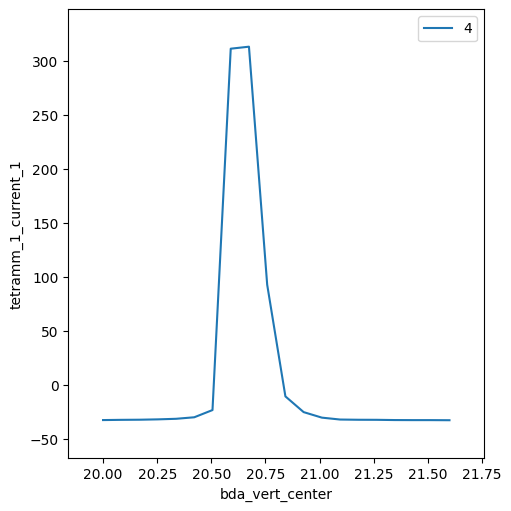

In [74]:
RE(bp.scan(dets, bda_vert.center, 20, 21.6, num=20))